In [2]:
#libraries
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# model - simple tank with heater
def temp(te,t,tin,q,m,cp):
    dTdt = tin - te + q/(m*cp)
    return dTdt

In [4]:
# heater model parameters
t = np.linspace(0,200,1000)
q = 100.0
m = 10.0
cp = 4.1
tin = 293.15
te0 = 293.15
te = np.ones(len(t))
te[0] = te0

In [5]:
# controller parameters
error = np.zeros(len(t))
qcontrol = np.ones(len(t))*100
sp = np.ones(len(t))*350
sp[600:] = 340

In [6]:
# tuning parameters for PID
kc = 1.2
taui = 5.0
taud = 5.0

Isum = 0
LastError = 0
Dsum = 0

In [9]:
#integrator
for i in range(len(t)-1):
    ## controller
    error[i] = sp[i] - te0
    Isum = Isum + (kc/taui)*error[i]
    Dsum = (kc/taud)*(error[i]-LastError)
    qcontrol[i] = qcontrol[0] + kc*error[i] + Isum + Dsum
    ##################################################
    tep = odeint(temp,te0,[t[i],t[i+1]],args=(tin,qcontrol[i],m,cp,))
    print(tep)
    te0 = tep[1]
    te[i+1] = tep[1]
    LastError = error[i]
#print(te)

[[340.81525194]
 [340.88482909]]
[[340.88482909]
 [348.79286667]]
[[348.79286667]
 [355.21708704]]
[[355.21708704]
 [360.43766131]]
[[360.43766131]
 [364.67351753]]
[[364.67351753]
 [368.1038176 ]]
[[368.1038176 ]
 [370.87516046]]
[[370.87516046]
 [373.10750311]]
[[373.10750311]
 [374.89900207]]
[[374.89900207]
 [376.32997514]]
[[376.32997514]
 [377.4661431 ]]
[[377.4661431 ]
 [378.36128244]]
[[378.36128244]
 [379.0593957 ]]
[[379.0593957 ]
 [379.59648714]]
[[379.59648714]
 [380.00201899]]
[[380.00201899]
 [380.30009706]]
[[380.30009706]
 [380.51044583]]
[[380.51044583]
 [380.64920385]]
[[380.64920385]
 [380.72957577]]
[[380.72957577]
 [380.76236958]]
[[380.76236958]
 [380.75641404]]
[[380.75641404]
 [380.71894618]]
[[380.71894618]
 [380.65588684]]
[[380.65588684]
 [380.57207399]]
[[380.57207399]
 [380.47146607]]
[[380.47146607]
 [380.35730186]]
[[380.35730186]
 [380.2322307 ]]
[[380.2322307]
 [380.0984194]]
[[380.0984194 ]
 [379.95763991]]
[[379.95763991]
 [379.81134112]]
[[379.811341

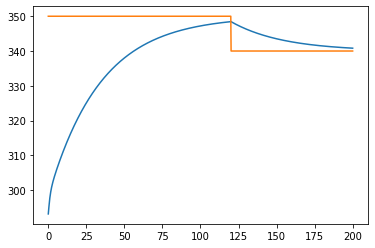

In [8]:
# plot them
plt.plot(t,te)
plt.plot(t,sp)
#plt.plot(t,qcontrol)
plt.show()